Die Prüfung wurde in JUNO auf dem Ipad gelöst
Es ist dabei wichtig, dass das Working Directory auf den Ordne SEP gesetzt wird.

In [1]:
from numbers import Number
import numpy as np
def calc_err_abs(x, xr):
    '''
    Berechnet den absoluten Fehler von x und xr
    x: Korrektes Ergebnis
    xr: Fehlerhaftes Ergebnis
    '''
    return abs(xr - x)

    
def calc_err_rel(x, xr):
    '''
    Berechnet den relativen Fehler von x und xr
    x: Korrektes Ergebnis
    xr: Fehlerhaftes Ergebnis
    '''
    return abs((xr - x) / x)



class Scientific():
    
    def __init__(self, x, precision):
        notation = np.format_float_scientific(x, precision = precision)
        number, exponent = notation.split('e')
        self._precision = precision

        number = float(number)
        number /= 10
        number = round(number, precision)
        
        exponent = int(exponent)
        exponent += 1

        self._mantisse = number
        self._exponent = exponent
        
    def get_mantisse(self):
        return self._mantisse
    
    def get_exponent(self):
        return self._exponent
    
    
    def align(self, exponent):
        diff = self._exponent - exponent
        if diff == 0:
            return
        self._exponent = exponent
        self._mantisse *= 10**diff


    def get_value(self):
        mantisse = round(self._mantisse, self._precision)

        return (mantisse, self._exponent)

    def as_float(self):
        return self._mantisse * 10**self._exponent

        

def calc_eps(B: Number, n: Number) -> Number:
    """
    B = Basis
    n = 
    Berechnet die obere Schranke
    """
    eps = 1/2
    eps *= B**(1-n)
    
    return eps
    
def add(a: Number, b: Number, precision: Number) -> Number:
    '''
    Addiert die Zahlen mit einer Genauigkeit
    a: Erste Zahl
    b: Zweite Zahl
    precision: Genauigkeit
    Gibt die Addierte Zahl zurück
    '''
    a = Scientific(a, precision)
    b = Scientific(b, precision)
    
    max_exponent = max(a.get_exponent(), b.get_exponent())

    a.align(max_exponent)
    b.align(max_exponent)
    
    mantisse = a.get_mantisse() + b.get_mantisse()
    
    mantisse = round(mantisse, precision)
    # convert back to usable format
    return mantisse * 10**max_exponent

def multiply(a: Number, b: Number, precision: Number) -> Number:
    
    a = Scientific(a, precision)
    b = Scientific(b, precision)
    
    max_exponent = max(a.get_exponent(), b.get_exponent())

    a.align(max_exponent)
    b.align(max_exponent)
    
    mantisse = a.get_mantisse() * b.get_mantisse()
    
    number = Scientific(mantisse * 10**(max_exponent*2), max_exponent *2)
    # convert back to usable format
    return number.get_mantisse() * 10**(number.get_exponent())

    
# Stuff above needed for calculations

print("Aufgabe 1")

def a():
    x = 1.46
    
    precision = 3
    
    x_16 = multiply(x, 16, precision)
    
    res = multiply(x, x, precision)
    print("x^2","=",res)
    
    res = multiply(48, res, precision)
    print("48 * x^2","=", res)

    res = add(res, multiply(16, x, precision), precision)
    print("48*x^2 + 16x","=",res)
    
    res = add(res, -12, precision)
    print ("48*x^2 + 16x - 12","=", res)
    
    def exact():
        x_64 = np.float64(x)
        
        return 48 * (x_64**2) + 16*x_64 - 12
    print ("=============== RESULTAT ===============")
    print("Rechnerarithmetik", res)
    print("Numpy (exakt)", exact())
    
    print (f"absoluter Fehler: {calc_err_abs(exact(), res)}")
    print (f"relativer Fehler: {calc_err_rel(exact(), res)}")

    
def b():
    x = 1.46
    precision = 3
    
    res = multiply(48, x, precision)
    print ("48x", "=", res)
    
    res = add(res, 16, precision)
    print ("(48x + 16)", "=", res)
    
    res = multiply(res, x, precision)
    print ("(48x + 16)*x", "=", res)
    
    res = add(res, -12, precision)
    print("(48x + 16)*x -12", "=", res)
    
    def exact():
        x_64 = np.float64(x)
        return (48*x_64+16) *x_64 -12
            
    
    print("=============== RESULTAT ===============")
    print("Rechnerarithmetik", res)
    print("Numpy (exakt)", exact())

    print (f"absoluter Fehler: {calc_err_abs(exact(), res)}")
    print (f"relativer Fehler: {calc_err_rel(exact(), res)}")

        
    
print ("Teil a")
a()

print()
print ("Teil b")
b()

print("FESTSTELLUNG")
print("Mit dem Horner Schema ist der Absolute Fehler 1.3 fach kleiner")

Aufgabe 1
Teil a
x^2 = 2.1
48 * x^2 = 100.8
48*x^2 + 16x = 124.0
48*x^2 + 16x - 12 = 112.0
=============== RESULTAT ===============
Rechnerarithmetik 112.0
Numpy (exakt) 113.67679999999999
absoluter Fehler: 1.6767999999999859
relativer Fehler: 0.014750591149645187

Teil b
48x = 70.08
(48x + 16) = 86.1
(48x + 16)*x = 125.7
(48x + 16)*x -12 = 114.0
=============== RESULTAT ===============
Rechnerarithmetik 114.0
Numpy (exakt) 113.6768
absoluter Fehler: 0.32319999999999993
relativer Fehler: 0.002843148294111023
FESTSTELLUNG
Mit dem Horner Schema ist der Absolute Fehler 1.3 fach kleiner


AUFGABE 2
Teil a
f(x) = x / ln(x)
f'(x) = (ln(x) - 1)/((ln(x))**2)
k(x) = (((ln(x) - 1)/((ln(x))**2)) *x)/(x / ln(x))
Konditionszahl k(x) = 1 - 1/log(x)
Relativer Fehler f(x0)
k(x0) = k(3) 0.08976
Teil b


__main__:51: RuntimeWarning: divide by zero encountered in log
__main__:51: RuntimeWarning: divide by zero encountered in true_divide
__main__:59: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


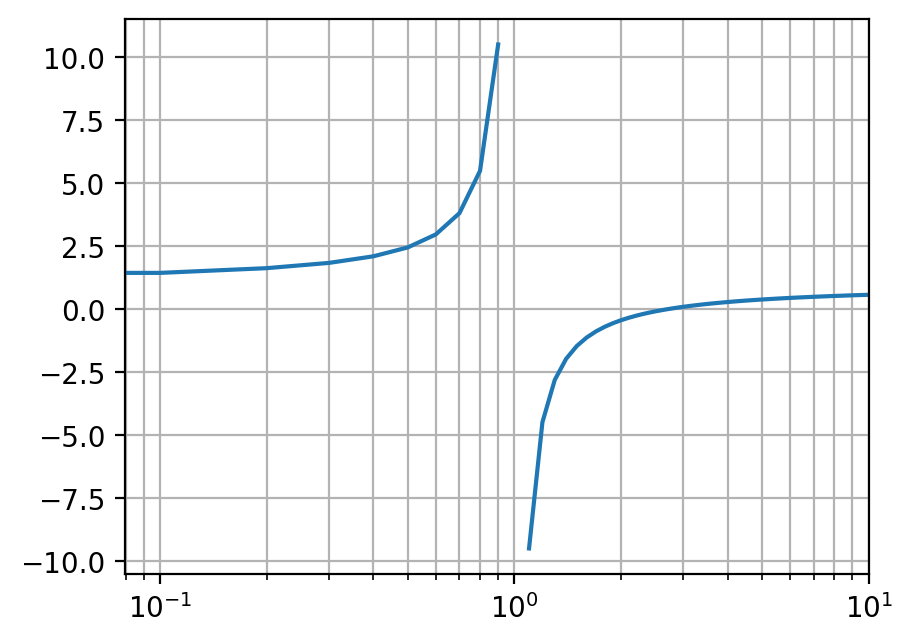

In [2]:
import numpy as np
import sympy as sp

def calc_cond(f: str, df: str="", log: bool = True):
    '''
    Berechnet die Konditionszahl der Funktion f
    
    f: Funktion als String
    log: False wenn keine Schritte ausgegeben werden sollen
    Returns: evaluated string
    '''
    
    x = sp.symbols('x')
    if len(df) == 0:
        df = sp.diff(f, x)
    if log:
        print (f"f(x) = {f}")
        print (f"f'(x) = {df}")
        
    eq = f"(({str(df)}) *x)/({f})"
    
    if log:
        print (f"k(x) = {eq}")
    
    return sp.simplify(eq)


def a():
    print ("Teil a")
    
    abs_err = 0.1
    x0 = 3
    
    f = "x / ln(x)"
    df = "(ln(x) - 1)/((ln(x))**2)"
    
    cond = calc_cond(f, df, True)
    print (f"Konditionszahl k(x) = {cond}")
    k = sp.sympify(cond)
    x = sp.symbols('x')
    
    print ("Relativer Fehler f(x0)")
    print (f"k(x0) = k({x0})", round(k.evalf(subs={'x': x0}),5))

def b():
    
    import matplotlib.pyplot as plot
    
    print ("Teil b")
    def k(x):
        return 1 - 1/np.log(x)
    
    # Display grid
    x = np.arange(0. ,10., 0.1)
    plot.grid(True, which="both")
    # Linear X axis, Logarithmic Y axis
    
    plot.semilogx(x, k(x) )
    plot.xlim([0,10])
    
    
    # K(x) <= 1 für x > b
    # K(X) > 1 für x < b
print ("AUFGABE 2")
a()
b()

Aufgabe 3
Plot


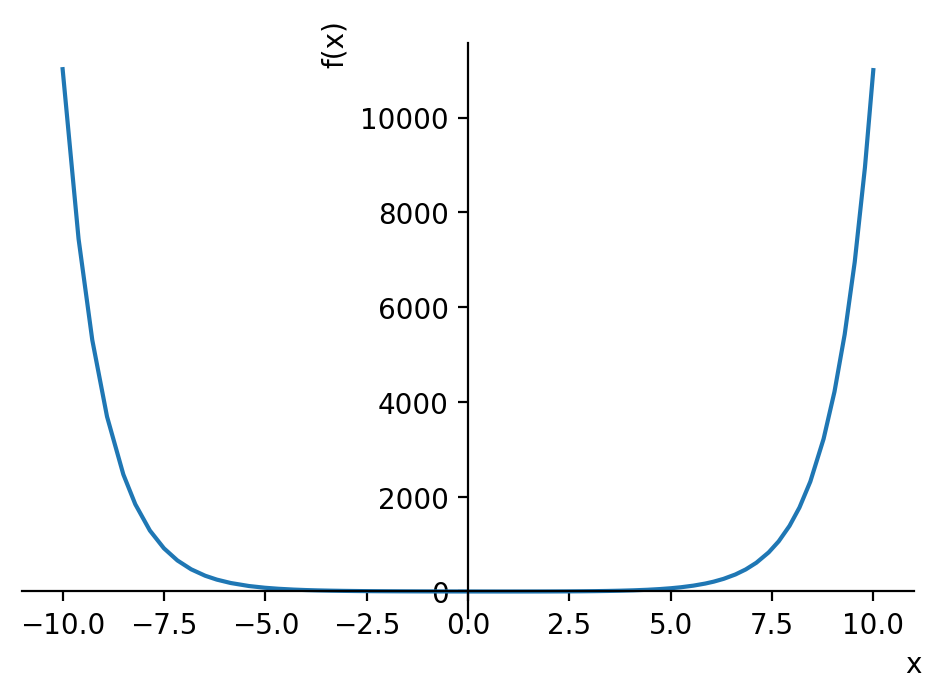

Teil a
Teil b
Approximativer Wert: 2.08519

Teil b
Resultat: -0.72526


In [3]:
from numbers import Number
import numpy as np
import sympy as sp

def calc_sekante(f, x0, x1, epsilon, log: bool = True):
    '''
    Iteriert nach dem sekanten Verfahren
    x0: Number
    x1: Number
    epsilon: Fehler
    '''
    
    x = [x0, x1]
    x.append(x1 - f(x1)/(x1+x0))
    i = 2
    
    if log:
         print (f"i\t F(x)")
         print (f"{0}\t {x[0]}")
         print (f"{1}\t {x[1]}")
    
    while f(x[i] - epsilon) * f(x[i] + epsilon) >= 0:
        
        xn_1 = x[i-1]
        xn_2 = x[i-2]
        
        xn = xn_1 - f(xn_1) / (xn_1+ xn_2)
        
        if log:
            print (f"{i}\t {xn}")
        
            
        i += 1
            
        x.append(xn)
        
    return x  

def calc_newton_with_tolerance(f: str, x0: Number, tolerance: Number, log: bool = True):
    '''
    Berechnet das Newtonverfahren
    f: Funktion
    x0: Startwert
    tolerance: Wird solange wiederholt, bis err < tolerance
    Returns: x
    '''
    f = sp.sympify(f)
    x = sp.symbols('x')
    df = sp.diff (f, x)
    i = 0
    x = [x0]
    err = np.inf
    
    if log:
        print (f"i\t F(x)\tErr")
        print (f"{0}\t {x[0]}, np.inf")
        
    expr = f / df
    i = 1
    
    def abbruch(x):
        a = expr.evalf(subs={'x': x - tolerance})
        b = expr.evalf(subs={'x': x + tolerance})
        
        return not (a*b) <= 0
    
    while abbruch(x[i-1]):
        xn = x[i-1] - expr.evalf(subs={'x': x[i-1]})
        x.append(xn)
        err = np.abs(x[i] - x[i-1])
        if log:
            print (f"{i}\t {x[i]},\t{err}")
        
        i += 1
    
    return x

def a():
	print ("Teil a")
	import numpy as np

	def f(x):
		return (np.exp(x)+np.exp(-x))/2-x-2

	x0 = 0.
	x1 = 0.5
	epsilon = 10**(-7)
	x = calc_sekante(f, x0, x1, epsilon, False)
	xr = x[len(x)-1]
	print ("Teil b")
	print(f"Approximativer Wert: {round(xr, 5)}")

	
def do_plot():

	print ("Plot")
	import sympy as sp
	from sympy.plotting import plot

	f = "(exp(x) + exp(-x))/2-x-2"

	# Create Sympy Equations
	f = sp.sympify(f)
	x = sp.symbols('x')

	plot(f)

def b():
	import numpy as np   
	print ("Teil b")
	f = "(exp(x) + exp(-x))/2-x-2"
	x0 = 0
	eps = 10**(-7)
	x = calc_newton_with_tolerance(f, x0, eps, False)

	print ("================")
	print (f"Resultat: {round(x[len(x)-1], 5)}")

print ("Aufgabe 3")
do_plot()
a()
print()
b()

In [4]:
import numpy as np
from numbers import Number


class Jacobi():
    def __init__(self, A, b, x0):
        self._A = A
        self._b = b
        self._x = [x0]
    
    def x_len(self) -> Number:
        return len(self._x)
        
    def get_x(self, index: Number) -> np.array:
        return self._x[index]
        
    def decomposite_A(self):
        '''
        Create decomposite of A
        returns [D, D_inv, L, R]
        '''
        D = np.diag(np.diag(self._A))
        D_inv = np.linalg.inv(D)
        L = np.tril(self._A, -1)
        R = np.triu(self._A, 1)

        return [D, D_inv, L, R]
        
    def calc_B(self) -> np.array:
        [D, D_inv, L, R] = self.decomposite_A()
        B = np.dot(-1, D_inv.dot(np.add(L, R)))
        return B
        
    def calc_xn(self, x):
        [D, D_inv, L, R] = self.decomposite_A()
        B = self.calc_B()
        
        return np.add(B.dot(x), D_inv.dot(self._b))
        
        
    def calc_a_posteriori_error(self,B, x, xn) -> Number:
        B_norm = np.linalg.norm(B, np.inf)
        x_norm = np.linalg.norm(xn - x, np.inf)

        err = (B_norm / (1 - B_norm)) * x_norm

        return err
        
    def estimate_a_priori(self, tol) -> Number:
        
        order = 1
        x0 = self._x[0]
        x1 = self.calc_xn(x0)
        
        B = self.calc_B()
        B_norm = np.linalg.norm(B, 1)
        x_norm = np.linalg.norm(x1 - x0, 1)

        n = np.log(((1 - B_norm) / x_norm) * tol) / np.log(B_norm)

        return n
    
    
        
    def iterate(self, tolerance=-1, log: bool = False):
        i = 0
        B = self.calc_B()
        
        if log:
            print(f"{i}.Iteration")
            print(self._x[i])
        
        while True:
            
            x = self._x[i]
            xn = self.calc_xn(x)
            self._x.append(xn)
            
            err = self.calc_a_posteriori_error(B, x, xn)
            i += 1
            
            if log:
                print(f"{i}.Iteration")
                print(self._x[i])
                print(f"A posteriori: {err}")
            
            if err <= tolerance:
                break
            
        
        return (i, x)  


x0 = np.array([-1, -1, 1, 1]).reshape(4,1)
tolerance = 10**(-3)
alpha = 0.3

A = np.array([
    [1, alpha, 0, -alpha],
    [alpha, 1, -alpha, 0],
    [0, -alpha, 1, alpha],
    [-alpha, 0, alpha, 1]
])

b = np.array([
    [2.3],
    [-1.3],
    [2.7],
    [-1.7]
])

jacobi = Jacobi(
    A,
    b,
    x0)


print ("Aufgabe 5")


estimation = jacobi.estimate_a_priori(tolerance)
print (f"A-Priori abschätzung: {estimation}  => {round(estimation)}")

iterations, result = jacobi.iterate(tolerance, False)

print ("Iterationen gebraucht:", iterations)
print ("Resultat x", result)

# def calc_a_posteriori_error(self,B, x, xn) -> Number:

Aufgabe 5
A-Priori abschätzung: 19.52879368221684  => 20.0
Iterationen gebraucht: 17
Resultat x [[ 1.99985894]
 [-1.00042317]
 [ 3.00014106]
 [-1.99957683]]


In [5]:
# Aufgabe 6
import numpy as np
from numbers import Number

class MisesIteration():
    def __init__(self, A: np.array, v: np.array):
        '''
        A: np.array
        v: np.array (Startvektor)
        '''
        
        self._A = A
        self._v = v
        self._log = True
        
    def enable_log(self, log: bool) -> None:
        '''
        Enables logging in class
        '''
        self._log = log
        
    
        
    def iterate(self, tolerance: Number = 0.01):
        '''
        Gibt eine Liste mit dem Format (Eigenvektor, Eigenwert) zurück
        tolerance: Wiederhole iteration, solange Unterschied der Eigenwerte grösser ist
        '''
        values = []
            
        def get_ev(i):
            return values[i][0]
            
        def get_ew(i):
            return values[i][1]
        
        def eigenvalue(A, v):
            Av = A.dot(v)
            return v.dot(Av)
            
        A = self._A
        v = self._v
        k = 0
        
        ev = eigenvalue(A, v)
        
        values.append((v, ev))
        
        if self._log:
            print(f"k\tv^k\tλ^k")
            print(f"{k}\t{get_ev(k).flatten()}\t{round(get_ew(k),5)}\t")

        def is_abbruch():
            if k == 0:
                return False
            
            norm = np.linalg.norm(get_ev(k) - get_ev(k-1), 2)
            
            return norm <= tolerance

        while not is_abbruch():
            Av = A.dot(get_ev(k))
            v = Av / np.linalg.norm(Av)
    
            ev = eigenvalue(A, v)
            
            k += 1
            values.append((v, ev))
            
            if self._log:
                print(f"{k}\t{v.flatten()}\t{ev}")
            
            if np.abs(get_ew(k-1) - ev) < tolerance:
                break
        
            
        return values

# Define matrix
A = np.array([
    [3, 0, 0],
    [1, 3, 0],
    [0, 0, 6]
])

# Anfangsvektor
x = np.array([1, 1, 1])

mises_iteration = MisesIteration(A, x)

# Logging einstellen
mises_iteration.enable_log(False)

# Iteriere bis Differenz 0.01 getroffen
values = mises_iteration.iterate(10**(-15))

print ("Aufgabe 6")
print ("Teil b")
print ("=============== RESULTAT ===============")
print ("Eigenwert", round(values[len(values)-1][1], 5))
print ("Eigenvektor", values[len(values)-1][0].flatten())

Aufgabe 6
Teil b
=============== RESULTAT ===============
Eigenwert 6.0
Eigenvektor [9.31322575e-10 1.02445483e-08 1.00000000e+00]
